In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
!pip install emoji
import emoji

!pip list
!pip install seaborn
!pip install scikit-learn
!pip install optuna


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip
Package                   Version
------------------------- --------------
alembic                   1.15.2
annotated-types           0.7.0
anyio                     4.9.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.4.26
cffi                      1.17.1
charset-normalizer        3.4.1
click                     8.1.8
cloudpathlib              0.21.0
colorlog                  6.9.0
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.2
cycler                    0.12.1
cy

In [2]:
df=pd.read_csv('scitweets_balanced.tsv', sep='\t')
display (df.head())

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0.0,3.166700e+17,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1.0,3.190909e+17,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2.0,3.220309e+17,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3.0,3.226948e+17,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4.0,3.285244e+17,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


In [3]:
#----------------------------------------------
#-------explorations des données---------------
#----------------------------------------------

In [4]:
print("Taille du DataFrame :", df.shape) # nb de lignes et colonnes

print("\nSix premières lignes :\n")
display(df.head(6))

print("\nTrois dernières lignes :\n")
display(df.tail(3))

print("\nCinq lignes au hasard :\n")
display(df.sample(5))

Taille du DataFrame : (1530, 7)

Six premières lignes :



,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0.0,3.166700e+17,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1.0,3.190909e+17,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2.0,3.220309e+17,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3.0,3.226948e+17,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4.0,3.285244e+17,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0
5,6.0,3.313962e+17,The Impact of Infertility on You and Your Rela...,0,0.0,0.0,0.0



Trois dernières lignes :



,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
1527,NaN,NaN,Priority for future research on impact of Covi...,1,NaN,NaN,NaN
1528,NaN,NaN,Reading facebook comments for 20 minutes is sc...,1,NaN,NaN,NaN
1529,NaN,NaN,Volume Caps Pills Male Sex Enhancement Increas...,1,NaN,NaN,NaN



Cinq lignes au hasard :



,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
148,161.0,4.915948e+17,"Disabled vehicle, center lane blocked in on Rt...",0,0.0,0.0,0.0
965,1063.0,1.201310e+18,#ASH19 Paper No: 2723 Sun 1/7/19 6-8 PM #BPDCN...,1,1.0,1.0,1.0
749,827.0,1.015669e+18,@fox_of_floof Because Trump and his administra...,0,0.0,0.0,0.0
388,420.0,7.053298e+17,Magnetic resonance imaging findings in giant c...,1,0.0,1.0,1.0
713,789.0,9.786926e+17,And the winners of the 2018 Five College DataF...,1,0.0,0.0,1.0


In [5]:
nb_SC = df[df["science_related"] == 1]["science_related"].count()
nb_non_SC = df[df["science_related"] == 0]["science_related"].count()

display(f"Nombre de tweets scientifiques : {nb_SC} ")
display(f"Nombre de tweets non scientifiques : {nb_non_SC}")

sc_bool = df[df["science_related"] == 1]

nb_claim = sc_bool[sc_bool["scientific_claim"] == 1.0]["tweet_id"].count()
nb_ref = sc_bool[sc_bool["scientific_reference"] == 1.0]["tweet_id"].count()
nb_context = sc_bool[sc_bool["scientific_context"] == 1.0]["tweet_id"].count()

nb_claim_ref = sc_bool[(sc_bool["scientific_claim"] == 1.0) & (sc_bool["scientific_reference"] == 1.0)]["tweet_id"].count()
nb_claim_context = sc_bool[(sc_bool["scientific_claim"] == 1.0) & (sc_bool["scientific_context"] == 1.0)]["tweet_id"].count()
nb_context_ref = sc_bool[(sc_bool["scientific_context"] == 1.0) & (sc_bool["scientific_reference"] == 1.0)]["tweet_id"].count()

nb_total = sc_bool[(sc_bool["scientific_claim"] == 1.0) |
                   (sc_bool["scientific_reference"] == 1.0) |
                   (sc_bool["scientific_context"] == 1.0)]["tweet_id"].count()


print(f"Nombre de tweets CLAIM : {nb_claim}")
print(f"Nombre de tweets REFERENCE : {nb_ref}")
print(f"Nombre de tweets CONTEXT : {nb_context}")
print(f"Nombre de tweets CLAIM & REF : {nb_claim_ref}")
print(f"Nombre de tweets CLAIM & CONTEXT : {nb_claim_context}")
print(f"Nombre de tweets CONTEXT & REF : {nb_context_ref}")
print(f"Nombre total de tweets ayant au moins une catégorie : {nb_total}")




'Nombre de tweets scientifiques : 765 '

'Nombre de tweets non scientifiques : 765'

Nombre de tweets CLAIM : 263
Nombre de tweets REFERENCE : 203
Nombre de tweets CONTEXT : 251
Nombre de tweets CLAIM & REF : 124
Nombre de tweets CLAIM & CONTEXT : 139
Nombre de tweets CONTEXT & REF : 203
Nombre total de tweets ayant au moins une catégorie : 375


In [6]:
import re
import emoji

def convert_emojis(text):
    return emoji.demojize(text)  # Convertit 😊 en :smiling_face_with_smiling_eyes:

df['text'] = df['text'].apply(convert_emojis)

# Détection d’URL "normaux"
df['has_url'] = df['text'].str.contains(r'http[s]?://', regex=True)

# Détection d’URL "réponse à des tweets"
#df['has_url_tweet'] = df['text'].str.contains(r'http[s]?://t.co/', regex=True)

# Détection de mentions (@username)
df['has_mention'] = df['text'].str.contains(r'@\w+', regex=True)

# Détection de hashtags (#mot)
df['has_hashtag'] = df['text'].str.contains(r'#\w+', regex=True)

# détection emojis
df['has_emoji'] = df['text'].str.contains(r':[^:\s]+:')

# Fonction d’agrégation
def count_by_category(col):
    return df.groupby('science_related')[col].sum()

print("- Tweets avec URL :")
display(count_by_category('has_url'))

print("- Tweets avec Mention :")
display(count_by_category('has_mention'))

print("- Tweets avec Hashtag :")
display(count_by_category('has_hashtag'))

print("- Tweets avec Emoji :")
display(df.groupby('science_related')['has_emoji'].sum())



- Tweets avec URL :


science_related
0    429
1    602
Name: has_url, dtype: int64

- Tweets avec Mention :


science_related
0    285
1    195
Name: has_mention, dtype: int64

- Tweets avec Hashtag :


science_related
0    249
1    349
Name: has_hashtag, dtype: int64

- Tweets avec Emoji :


science_related
0    81
1    13
Name: has_emoji, dtype: int64

In [7]:
#------------------------------------------------------------
#--------matrice tf-idf avce les données brut---------------
#-------------------------------------------------------------

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse

# ✅ Étape 1 : Nettoyage minimal (juste éviter les NaN)
df.dropna(subset=['text'], inplace=True)

# ✅ Étape 2 : Sélection du texte brut (pas de nettoyage ici)
X_text = df['text']  # Texte brut, pas 'text_clean'
y = df['science_related']  # Labels binaires

# ✅ Étape 3 : Création de la matrice TF-IDF à partir du texte brut
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X_text)

# ✅ Étape 4 : Création de la matrice des features binaires
# Convertir les booléens en int (0 ou 1) si ce n'est pas déjà fait
extra_features = df[['has_url', 'has_mention', 'has_hashtag', 'has_emoji']].astype(int)
X_extra = scipy.sparse.csr_matrix(extra_features.values)

# ✅ Étape 5 : Concaténer TF-IDF + features supplémentaires
X_final = scipy.sparse.hstack([X_tfidf, X_extra])

# ✅ Étape 6 : Affichage
print("📐 Taille de la matrice TF-IDF :", X_tfidf.shape)
print("📐 Taille des features supplémentaires :", X_extra.shape)
print("📐 Taille finale (TF-IDF + extra features) :", X_final.shape)


📐 Taille de la matrice TF-IDF : (1530, 8059)
📐 Taille des features supplémentaires : (1530, 4)
📐 Taille finale (TF-IDF + extra features) : (1530, 8063)


In [9]:
import re
import pandas as pd

# Convertir la matrice TF-IDF en DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Fonction de catégorisation
def get_token_category(token):
    if token.isdigit():
        return 'numeric'
    if re.match(r'^\d+(am|pm|s|h|min|sec|hour|years)?$', token.lower()):
        return 'timestamp'
    if re.match(r'^[a-zA-Z]+$', token):
        return 'valid'
    return 'other'

# Classer chaque token
token_categories = {token: get_token_category(token) for token in tfidf_df.columns}

# Regrouper par type
valid_tokens = [token for token, cat in token_categories.items() if cat == 'valid']
numeric_tokens = [token for token, cat in token_categories.items() if cat == 'numeric']
timestamp_tokens = [token for token, cat in token_categories.items() if cat == 'timestamp']

# Colonnes agrégées
tfidf_df['numeric'] = tfidf_df[numeric_tokens].sum(axis=1) if numeric_tokens else 0
tfidf_df['timestamp'] = tfidf_df[timestamp_tokens].sum(axis=1) if timestamp_tokens else 0

# Garder uniquement les tokens valides + colonnes synthétiques
tfidf_cleaned = tfidf_df[valid_tokens + ['numeric', 'timestamp']]

# Aperçu
print("📄 Aperçu de la matrice TF-IDF (texte brut)")
display(tfidf_cleaned.head())
print("📐 Taille finale :", tfidf_cleaned.shape)


📄 Aperçu de la matrice TF-IDF (texte brut)


,aamiin,aap,ab,abah,abbotslangley,abc,abcnetwork,abcnews,abdi,abeg,...,zika,zimmerman,zjghyzrngd,zmgaadmoei,zmrbajxmnu,zodiacareus,zomato,zoo,numeric,timestamp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


📐 Taille finale : (1530, 6783)


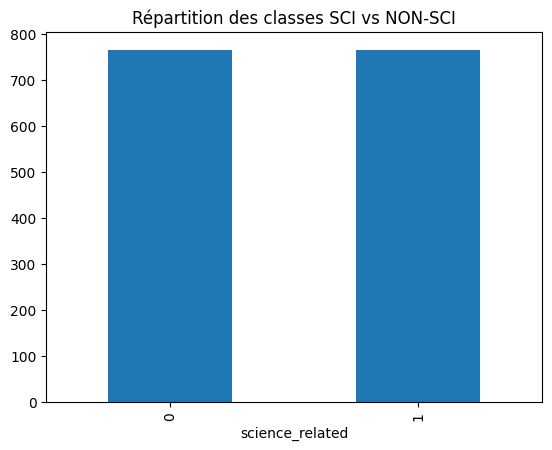

In [10]:
df['science_related'].value_counts().plot(kind='bar', title="Répartition des classes SCI vs NON-SCI")
plt.show()

In [13]:
# (80% entraînement, 20% test)
#X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=df['science_related'])
#print(X_test)

#print(f"Taille du jeu d'entraînement : {X_train.shape[0]} échantillons")
#print(f"Taille du jeu de test : {X_test.shape[0]} échantillons")


🔍 Cross-validation du modèle : Naïve Bayes

📊 Dernier fold : Rapport pour Naïve Bayes
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       153
           1       0.73      0.94      0.82       153

    accuracy                           0.79       306
   macro avg       0.82      0.79      0.79       306
weighted avg       0.82      0.79      0.79       306



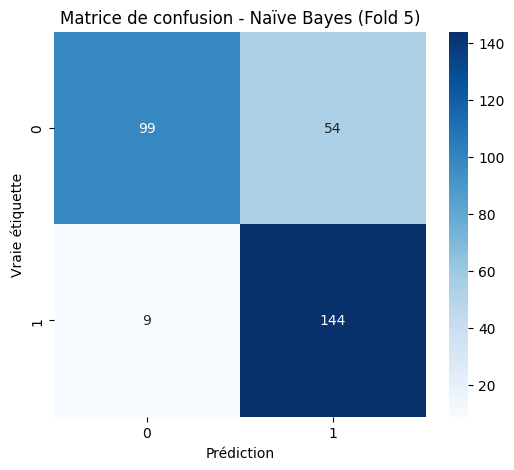


🔍 Cross-validation du modèle : Random Forest

📊 Dernier fold : Rapport pour Random Forest
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       153
           1       0.91      0.84      0.87       153

    accuracy                           0.88       306
   macro avg       0.88      0.88      0.88       306
weighted avg       0.88      0.88      0.88       306



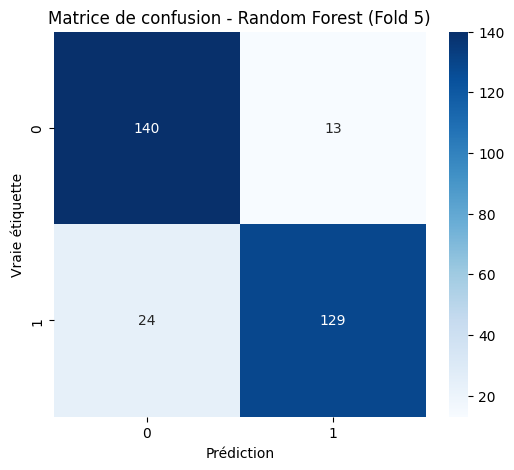


🔍 Cross-validation du modèle : SVM

📊 Dernier fold : Rapport pour SVM
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       153
           1       0.84      0.88      0.86       153

    accuracy                           0.85       306
   macro avg       0.85      0.85      0.85       306
weighted avg       0.85      0.85      0.85       306



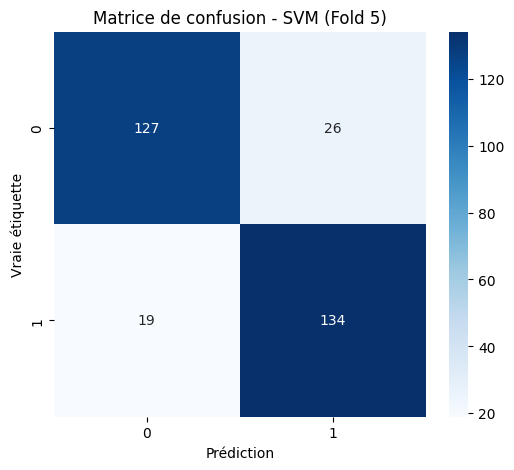


🔍 Cross-validation du modèle : KNN

📊 Dernier fold : Rapport pour KNN
              precision    recall  f1-score   support

           0       0.88      0.56      0.69       153
           1       0.68      0.92      0.78       153

    accuracy                           0.74       306
   macro avg       0.78      0.74      0.73       306
weighted avg       0.78      0.74      0.73       306



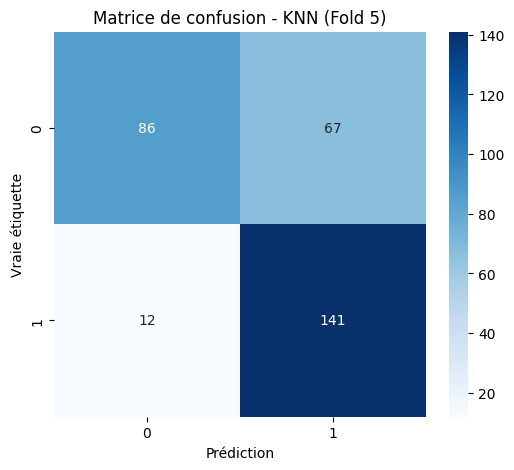


🔍 Cross-validation du modèle : AdaBoost

📊 Dernier fold : Rapport pour AdaBoost
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       153
           1       0.74      0.82      0.78       153

    accuracy                           0.76       306
   macro avg       0.77      0.76      0.76       306
weighted avg       0.77      0.76      0.76       306



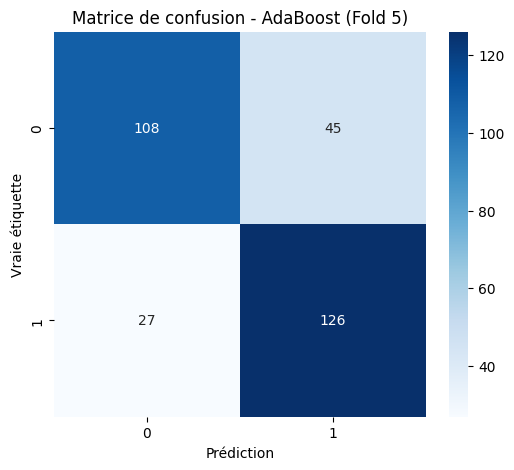


🔍 Cross-validation du modèle : XGBoost


/Users/salhinina/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:35:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:35:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:35:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:35:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not


📊 Dernier fold : Rapport pour XGBoost
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       153
           1       0.85      0.91      0.88       153

    accuracy                           0.88       306
   macro avg       0.88      0.88      0.88       306
weighted avg       0.88      0.88      0.88       306



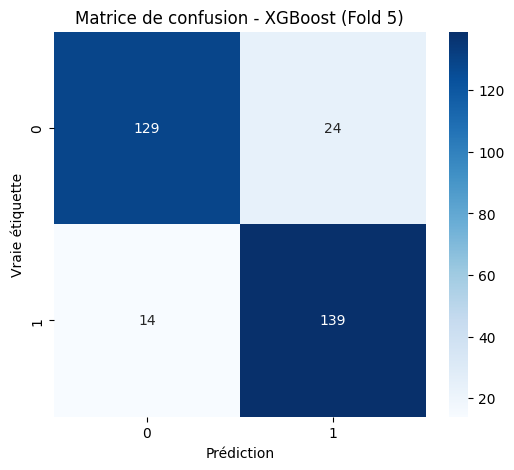


🔍 Cross-validation du modèle : MLP

📊 Dernier fold : Rapport pour MLP
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       153
           1       0.86      0.88      0.87       153

    accuracy                           0.87       306
   macro avg       0.87      0.87      0.87       306
weighted avg       0.87      0.87      0.87       306



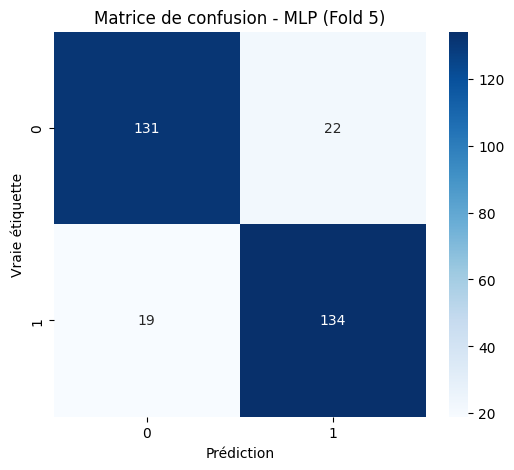

,Accuracy,Precision,Recall,F1 Score
Naïve Bayes,0.80 ± 0.01,0.83 ± 0.01,0.80 ± 0.01,0.79 ± 0.01
Random Forest,0.89 ± 0.02,0.90 ± 0.02,0.89 ± 0.02,0.89 ± 0.02
SVM,0.86 ± 0.01,0.86 ± 0.01,0.86 ± 0.01,0.86 ± 0.01
KNN,0.75 ± 0.01,0.77 ± 0.01,0.75 ± 0.01,0.74 ± 0.01
AdaBoost,0.76 ± 0.02,0.76 ± 0.02,0.76 ± 0.02,0.76 ± 0.03
XGBoost,0.87 ± 0.03,0.87 ± 0.03,0.87 ± 0.03,0.87 ± 0.03
MLP,0.90 ± 0.02,0.90 ± 0.02,0.90 ± 0.02,0.90 ± 0.02


/var/folders/pf/x8z57h4121s6cmtp02twbdd00000gn/T/ipykernel_74412/4162528656.py:90: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/salhinina/mon_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


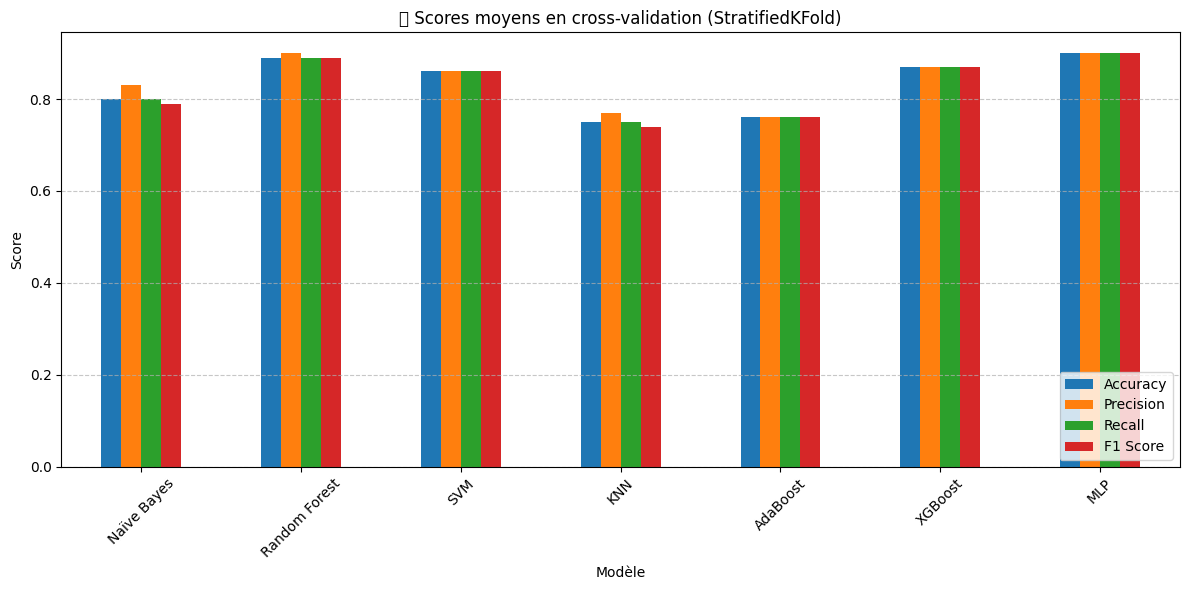

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, make_scorer
)
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(max_iter=300)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scorers = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score, average='weighted'),
    "Recall": make_scorer(recall_score, average='weighted'),
    "F1 Score": make_scorer(f1_score, average='weighted')
}

results = {}

for name, model in models.items():
    print(f"\n🔍 Cross-validation du modèle : {name}")
    scores = {metric: [] for metric in scorers}
    
    for fold, (train_idx, test_idx) in enumerate(cv.split(X_final, y)):
        X_train, X_test = X_final[train_idx], X_final[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Évaluation sur le fold
        for metric_name, scorer in scorers.items():
            score = scorer._score_func(y_test, y_pred, **scorer._kwargs)
            scores[metric_name].append(score)

        # Affichage pour un seul fold (ex : le dernier)
        if fold == cv.n_splits - 1:
            print(f"\n📊 Dernier fold : Rapport pour {name}")
            print(classification_report(y_test, y_pred))
            plt.figure(figsize=(6, 5))
            sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
            plt.title(f'Matrice de confusion - {name} (Fold {fold+1})')
            plt.xlabel('Prédiction')
            plt.ylabel('Vraie étiquette')
            plt.show()
    
    # Moyennes ± écarts-types
    results[name] = {
        metric: f"{pd.Series(scores[metric]).mean():.2f} ± {pd.Series(scores[metric]).std():.2f}"
        for metric in scorers
    }

# Résumé des résultats
df_scores = pd.DataFrame(results).T
display(df_scores)

# Visualisation (moyennes seules)
plot_df = df_scores.applymap(lambda x: float(x.split("±")[0]))
plot_df.plot(kind='bar', figsize=(12, 6))
plt.title("📊 Scores moyens en cross-validation (StratifiedKFold)")
plt.xlabel("Modèle")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
